In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [2]:
output_dir = os.path.join('..', 'outputs', 'cnn-rnn')
targets = ['f2', 'recall', 'precision', 'hs']

scores = []

experimentos = os.listdir(output_dir)
apellidos = ['_weighted_1']


# Iterar sobre archivos de resultados sacando el target buscado
for exp in experimentos:
    for apellido in apellidos:
        scores_exp = []
        path_predicciones = os.path.join(output_dir, exp, f'{107}L{apellido}', 'metadata.csv')
        predicciones = pd.read_csv(path_predicciones, index_col = 0)
        for target in targets:
            score = float(predicciones.loc[[target]].values[0][0])
            #print(path_predicciones, score[0][0])
            scores_exp.append(score)
        scores.append(scores_exp)
        
da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop': 3,
    'elastic': 4,
    'rain': 5,
    'randaug': 6,
    'gausblur': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref rot': 10,
    'rain ref rot': 11,
    'rain ref rot elastic': 12,
    'blur rain ref rot elastic': 13,
    'blur rain ref rot crop elastic': 14,
    'blur rain ref rot crop randaug elastic': 15,
}

In [3]:
techniques = []
for exp in experimentos:
    label = exp.replace('_', ' ')
    label = label.replace('1', '')
    techniques.append(str(da_map[label]))
techniques

['0',
 '8',
 '14',
 '15',
 '13',
 '3',
 '4',
 '7',
 '9',
 '5',
 '11',
 '12',
 '6',
 '2',
 '10',
 '1']

In [4]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['figure.dpi'] = 1000

In [5]:
scores_f2 = []
scores_recall = []
scores_precision = []
scores_hs = []
for el in scores:
    scores_f2.append(el[0])
    scores_recall.append(el[1])
    scores_precision.append(el[2])
    scores_hs.append(el[3])
scores_f2

[0.1481,
 0.1268,
 0.1152,
 0.0254,
 0.0918,
 0.1839,
 0.1398,
 0.1056,
 0.009,
 0.1482,
 0.1163,
 0.13,
 0.1369,
 0.07,
 0.106,
 0.0998]

9 0.009
15 0.0254
2 0.07
13 0.0918
1 0.0998
7 0.1056
10 0.106
14 0.1152
11 0.1163
8 0.1268
12 0.13
6 0.1369
4 0.1398
0 0.1481
5 0.1482
3 0.1839


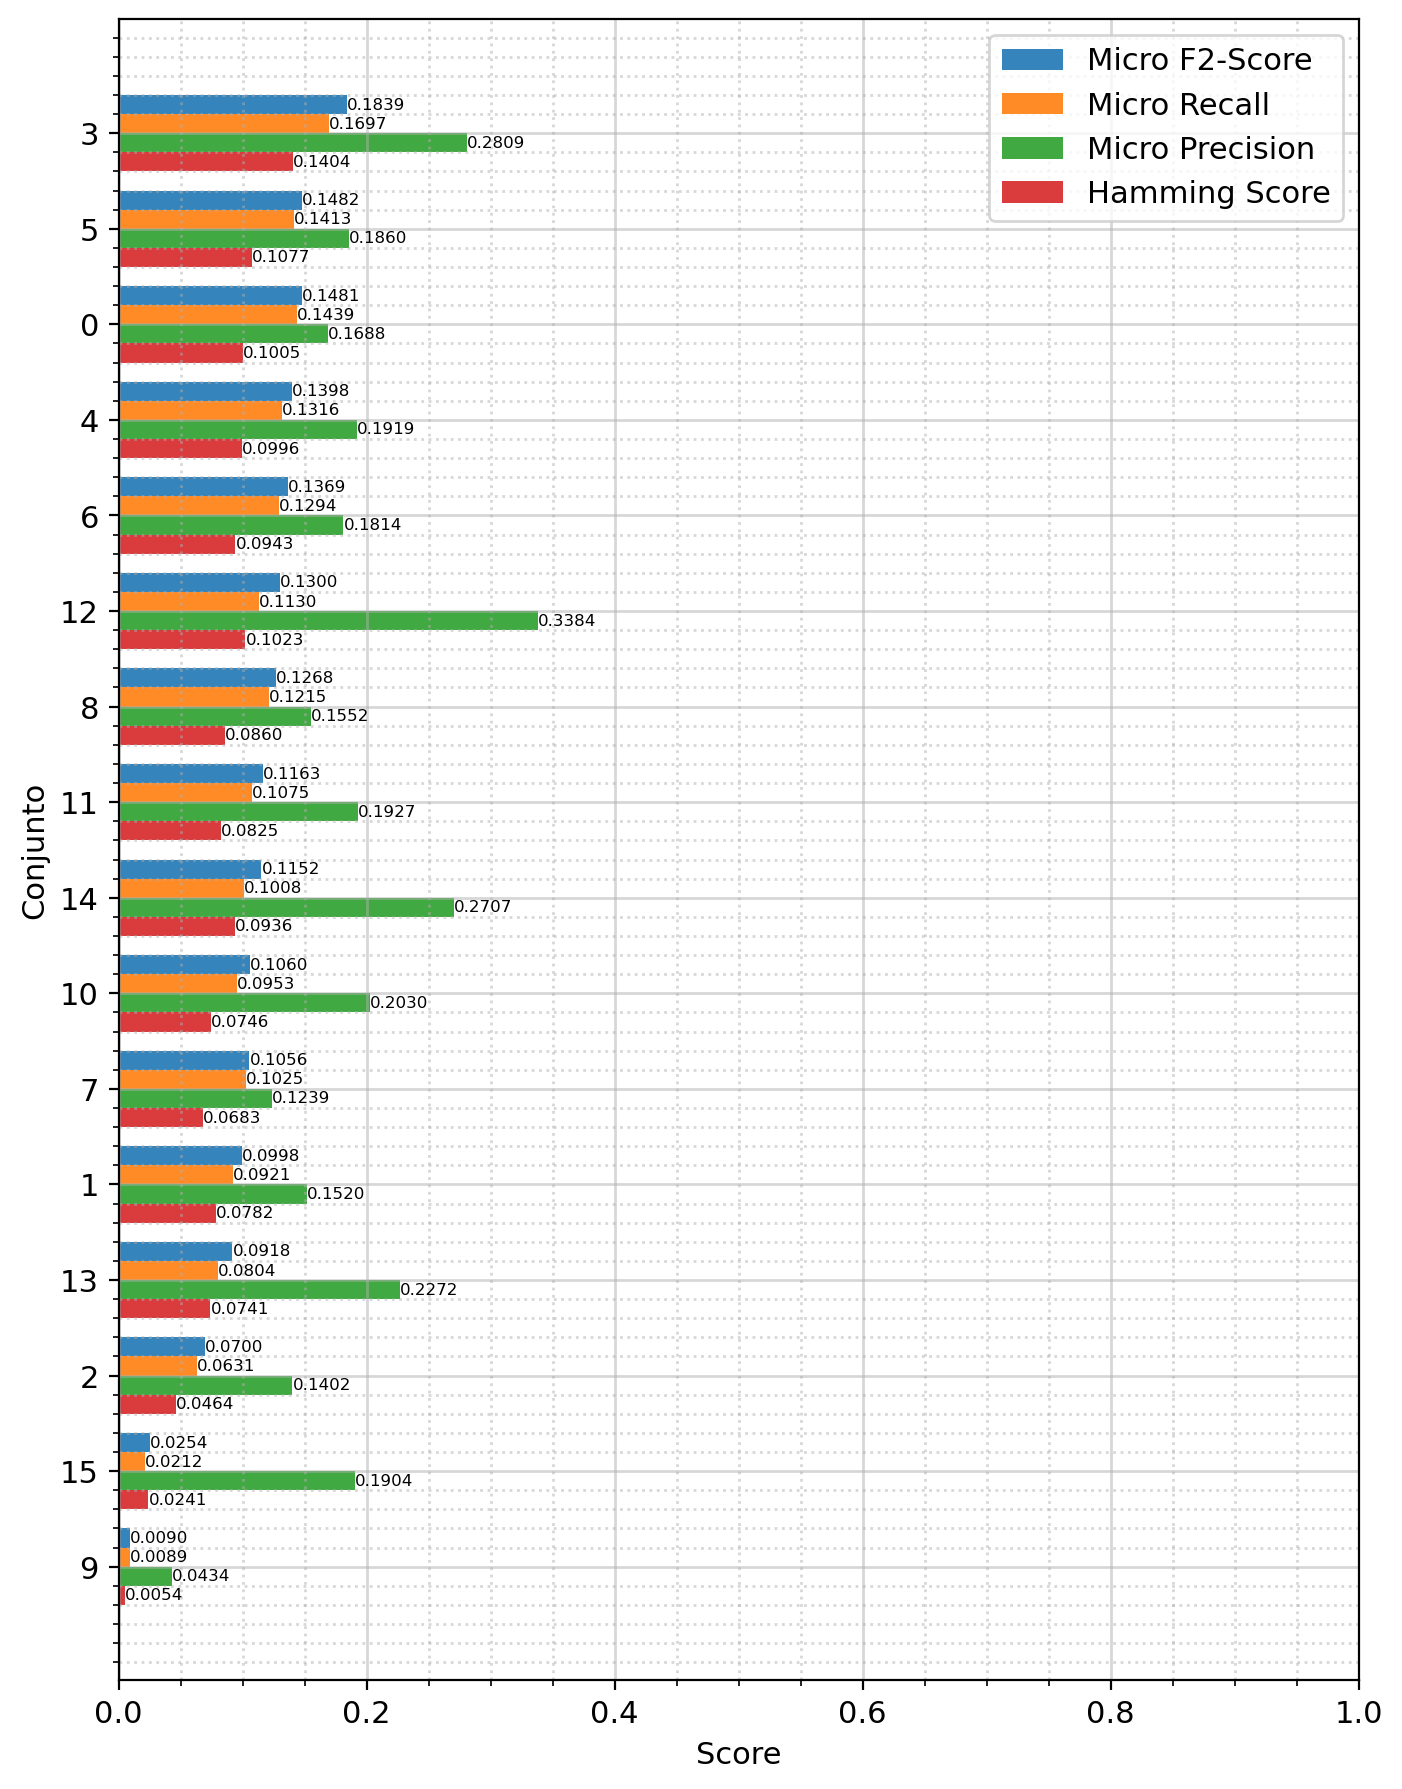

In [6]:
# ordenar 
s_f2, s_recall, s_precision, s_hs, techsorted = zip(
    *sorted(zip(scores_f2, scores_recall, scores_precision, scores_hs, techniques)))

for i in range(0, len(techniques)):
    print(techsorted[i], s_f2[i])
     
# wrap de las etiquetas cuando exceden cierto largo
techsorted = ['\n'.join(wrap(l, 22)) for l in techsorted]
x = np.arange(len(techsorted))

fig, ax = plt.subplots()
width = 0.2

b1 = ax.barh(x + 0.3, s_f2, width, label = 'Micro F2-Score', color='tab:blue', alpha=0.9)
b2 = ax.barh(x + 0.1, s_recall, width, label = 'Micro Recall', color='tab:orange', alpha=0.9)
b3 = ax.barh(x - 0.1, s_precision, width, label = 'Micro Precision', color='tab:green', alpha=0.9)
b4 = ax.barh(x - 0.3, s_hs, width, label = 'Hamming Score', color='tab:red', alpha=0.9)

ax.set_xlabel('Score')
ax.set_ylabel('Conjunto')

#ax.set_title(target_name + '\nAlexNet sobre 107 etiquetas más frecuentes\nVariando conjunto de datos')


# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)

            
ax.bar_label(b1, fmt= '%.4f', padding=0, color='black', size=6)
ax.bar_label(b2, fmt= '%.4f', padding=0, color='black', size=6)
ax.bar_label(b3, fmt= '%.4f', padding=0, color='black', size=6)
ax.bar_label(b4, fmt= '%.4f', padding=0, color='black', size=6)

ax.set_yticks(x, techsorted)

ax.legend()


ax.set_xlim(0, 1)
plt.show()
